# End-to-end Profiling Plot

The following code is used to generate Figure 7.

Profiling data are provided in `logs/log.csv`, manually captured from Xihe service and client profiler.

In [1]:
import os
os.chdir(f'{os.getcwd()}/../../')
WORKING_DIR = './evaluation/profile_end2end'

In [2]:
%matplotlib inline
import glob
import pandas
import imageio
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True)

In [3]:
df = pd.read_csv(f'{WORKING_DIR}/logs/log.csv')

In [4]:
df[['Edge Computation']] = df['processing'] + df['inference']

<ipython-input-5-ec47558dcbb1>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks().astype(np.int), size=20)


<Figure size 720x360 with 0 Axes>

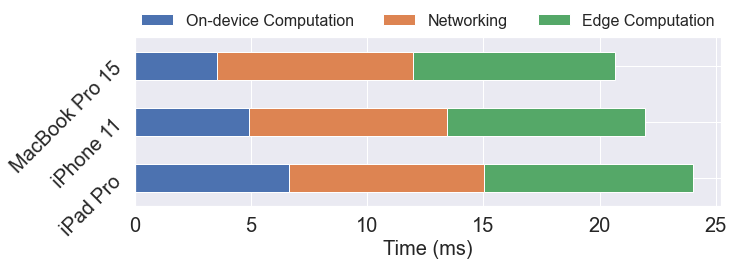

In [5]:
plt.figure(figsize=(10, 5))

ax = df.groupby('device').mean()[['on-device', 'networking', 'Edge Computation']].plot.barh(stacked=True, figsize=(10, 3.5))

ax.set_xlabel('Time (ms)', fontsize=20)
ax.set_ylabel('', fontsize=20)

l = plt.legend(
    loc='lower center', fontsize=16, bbox_to_anchor=(0., 1.02, 1., .102), mode='expand', borderaxespad=0.,
    labels=['On-device Computation', 'Networking', 'Edge Computation'], ncol=3,
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0)
)
l.get_frame().set_alpha(None)
# l.get_frame().set_()
# l.set_title('System Component')
# ax.get_legend().set_text(['On-device Computation', 'Networking', 'Edge Computation', 'Edge Inference'])
# plt.setp(['On-device Computation', 'Networking', 'Edge Computation', 'Edge Inference'], fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize=18) # for legend title

# ax.set_xticklabels([256 + 256 * v for v in range(8)], size=14)
ax.set_xticklabels(ax.get_xticks().astype(np.int), size=20)
ax.set_yticklabels([
    'iPad Pro',
    'iPhone 11', 
    'MacBook Pro 15'
], size=20, rotation=45)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/e2e.pdf')